# Atelier 5 : Apprentissage non supervisée

## Partie 1 : K-mean

In [9]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [18]:
# Génération des données

In [13]:
features, true_labels = make_blobs(
n_samples=200,
centers=3,
cluster_std=2.75,
random_state=42
)

### Question 1 : Appliquez la fonction « StandardScaler » pour que les données aient une moyenne de 0 et un écart type de 1.

In [16]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

print("Moyenne des données standardisées : ", scaled_features.mean(axis=0))
print("Écart type des données standardisées : ", scaled_features.std(axis=0))

Moyenne des données standardisées :  [9.82547377e-17 4.91273688e-17]
Écart type des données standardisées :  [1. 1.]


In [20]:
kmeans = KMeans(
init="random",
n_clusters=3,
n_init=10,
max_iter=300,
random_state=42
)
kmeans.fit(scaled_features)

C:\Users\merye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

### Question 2 : A partir de votre console, affichez et discutez les valeurs suivantes :
#### a) kmeans.inertia_
#### b) kmeans.cluster_centers_
#### c) kmeans.n_iter_
#### d) kmeans.labels_[:5]

In [23]:
print("a) Inertie (kmeans.inertia_):", kmeans.inertia_)

print("\nb) Centres des clusters (kmeans.cluster_centers_):")
print(kmeans.cluster_centers_)

print("\nc) Nombre d'itérations (kmeans.n_iter_):", kmeans.n_iter_)

print("\nd) Étiquettes des 5 premières données (kmeans.labels_[:5]):", kmeans.labels_[:5])

a) Inertie (kmeans.inertia_): 74.57960106819854

b) Centres des clusters (kmeans.cluster_centers_):
[[ 1.19539276  0.13158148]
 [-0.25813925  1.05589975]
 [-0.91941183 -1.18551732]]

c) Nombre d'itérations (kmeans.n_iter_): 10

d) Étiquettes des 5 premières données (kmeans.labels_[:5]): [0 1 2 2 2]


#### Une valeur de 74.58 indique que les points sont assez bien regroupés autour de leurs centres, mais elle est à comparer avec d'autres valeurs pour juger de la qualité des clusters.

#### Les centres des clusters représentent les coordonnées moyennes des points dans chaque groupe. Les centres sont suffisamment distants les uns des autres, suggérant que les clusters sont bien séparés dans l'espace des caractéristiques.

#### L'algorithme a convergé en 10 itérations, ce qui est relativement rapide. Cela signifie que l'algorithme a trouvé des centres stables sans difficulté majeure.

#### Ces étiquettes montrent que les premières données appartiennent aux clusters 0, 1, et 2. Cela illustre une attribution cohérente des données aux clusters, avec plusieurs points appartenant au même cluster, indiquant une bonne séparation.

In [28]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}
sse = []
for k in range(1, 11):
 kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
 kmeans.fit(scaled_features)
 sse.append(kmeans.inertia_)

C:\Users\merye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\merye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\merye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\merye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

## Question 3 : Dressez le plot représentant le SSE en fonction du nombre de clusters. Que constatez-vous ? Quel est la meilleure valeur du k ?

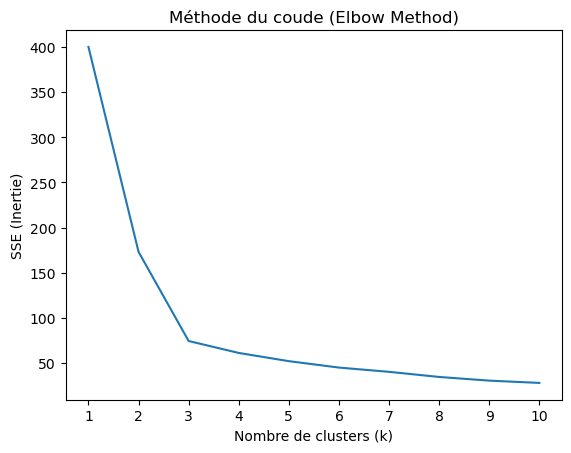

In [31]:
import matplotlib.pyplot as plt

# méthode Elbow
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("SSE (Inertie)")
plt.title("Méthode du coude (Elbow Method)")
plt.show()

#### La meilleure valeur pour k semble être 3, car c'est le point où le coude se forme. Cela signifie que 3 clusters sont suffisants pour capturer la structure des données sans ajouter de complexité inutile.

In [34]:
##Pour déterminer automatiquement la valeur de k, on peut utiliser la fonction
##« kneeLocator » comme suit :
kl = KneeLocator( range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

In [36]:
silhouette_coefficients = []
for k in range(2, 11):
 kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
 kmeans.fit(scaled_features)
 score = silhouette_score(scaled_features, kmeans.labels_)
 silhouette_coefficients.append(score)

C:\Users\merye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\merye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\merye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\merye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

## Question 4 Dressez le plot représentant le coefficient de silhouette en fonction du nombre de clusters. Que constatez-vous ? Quel est la meilleure valeur du k ?

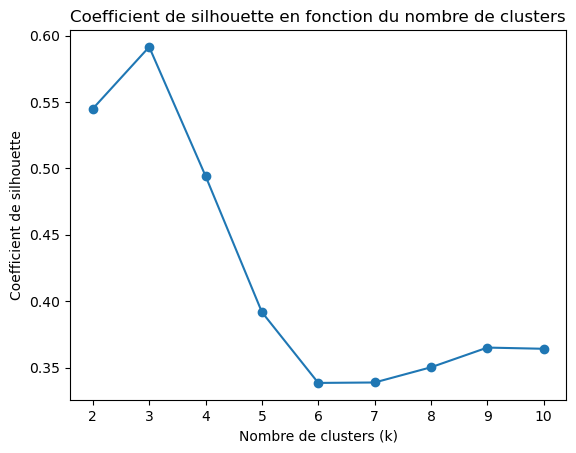

In [39]:
import matplotlib.pyplot as plt

# Tracé du coefficient de silhouette en fonction du nombre de clusters
plt.plot(range(2, 11), silhouette_coefficients, marker='o')
plt.xticks(range(2, 11))
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Coefficient de silhouette")
plt.title("Coefficient de silhouette en fonction du nombre de clusters")
plt.show()


#### Le meilleur k pour ce jeu de données est k = 3, car il offre le score de silhouette le plus élevé et indique une bonne séparation des clusters.

## Partie 2 : Classification Ascendante Hiérarchique

In [47]:
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd

In [49]:
#Importez la base de données « iris » et la transformer en un DataFrame.
iris = datasets.load_iris()
X = iris.data
X = pd.DataFrame(X)

In [51]:
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [53]:
#La fonction « linkage() » de la bibliothèque « scipy » permet de la matrice de distance Z.
#La distance par défaut utilisée est la distance euclidienne et le critère de
#regroupement (linkage) est par défaut le critère de Ward.

Z = linkage(X, method="ward")

In [55]:
print(Z)

[[1.01000000e+02 1.42000000e+02 0.00000000e+00 2.00000000e+00]
 [7.00000000e+00 3.90000000e+01 1.00000000e-01 2.00000000e+00]
 [0.00000000e+00 1.70000000e+01 1.00000000e-01 2.00000000e+00]
 [9.00000000e+00 3.40000000e+01 1.00000000e-01 2.00000000e+00]
 [1.28000000e+02 1.32000000e+02 1.00000000e-01 2.00000000e+00]
 [1.00000000e+01 4.80000000e+01 1.00000000e-01 2.00000000e+00]
 [4.00000000e+00 3.70000000e+01 1.41421356e-01 2.00000000e+00]
 [1.90000000e+01 2.10000000e+01 1.41421356e-01 2.00000000e+00]
 [2.90000000e+01 3.00000000e+01 1.41421356e-01 2.00000000e+00]
 [5.70000000e+01 9.30000000e+01 1.41421356e-01 2.00000000e+00]
 [8.00000000e+01 8.10000000e+01 1.41421356e-01 2.00000000e+00]
 [1.16000000e+02 1.37000000e+02 1.41421356e-01 2.00000000e+00]
 [8.00000000e+00 3.80000000e+01 1.41421356e-01 2.00000000e+00]
 [3.00000000e+00 4.70000000e+01 1.41421356e-01 2.00000000e+00]
 [2.70000000e+01 2.80000000e+01 1.41421356e-01 2.00000000e+00]
 [8.20000000e+01 9.20000000e+01 1.41421356e-01 2.000000

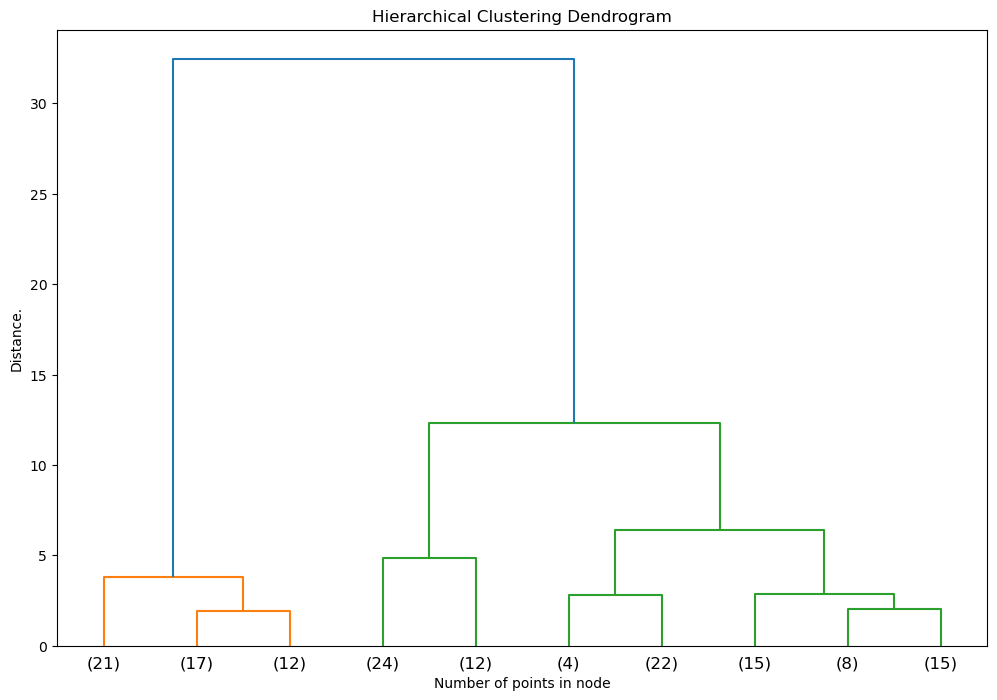

In [57]:
ig, ax = plt.subplots(1, 1, figsize=(12, 8))
D = dendrogram(Z, p=10, truncate_mode="lastp", ax=ax)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node")
plt.ylabel("Distance.")
plt.show()

#### Dans cet exemple, on pourrait envisager de couper à une distance d'environ 10-15, ce qui séparerait clairement certains clusters. Cependant, le choix du seuil dépend du nombre de groupes que vous souhaitez obtenir et de la structure des données.